In [25]:
import geopandas as gpd
import pandas as pd
import warnings 

%run data_cleaning.ipynb

centroids = pd.read_csv(r"data\CensusTractCentroids.csv")
census_data = data = pd.read_csv(r"data\B08119_stl_city.csv")
race_data = pd.read_csv(r"data\B08105_stl_city.csv")
tracts_shapefile = gpd.read_file(r"data\census tracts\CensusTractsStl.shp")

by_tract = clean(census_data, race_data)

centroid_locations_small = centroids[['NAMELSAD','INTPTLAT','INTPTLON']]
centroid_locations_small = centroid_locations_small.rename(columns = {"NAMELSAD": "location", "INTPTLAT" : "LAT", "INTPTLON" : "LON"})
full_data = by_tract.merge(centroid_locations_small, on='location')

tracts_shapefile["INTPTLAT"] = tracts_shapefile.INTPTLAT.astype(float)
tracts_shapefile = tracts_shapefile.rename(columns={"INTPTLAT": "LAT"})

tracts_shapefile.head()

gdf = gpd.GeoDataFrame(full_data.merge(tracts_shapefile, on="LAT"))

In [36]:
gdf.to_file('data\AllTractData.shp', driver='ESRI Shapefile')
gdf.head()

,location,estimate,transit weight,income weight,race weight,LAT,LON,STATEFP,COUNTYFP,TRACTCE,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLON,LAYER,AREA_SQMI,SHAPE_area,SHAPE_len,geometry
0,Census Tract 1011,1039,0.003275,0.009653,0.007499,38.554718,-90.273620,29,510,101100,...,G5020,S,1193566,60582,-090.2736200,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,"POLYGON ((-90.28692 38.55556, -90.28688 38.555..."
1,Census Tract 1012,1921,0.001162,0.009570,0.012480,38.561824,-90.274863,29,510,101200,...,G5020,S,1073335,10194,-090.2748635,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,"POLYGON ((-90.28262 38.56014, -90.28197 38.560..."
2,Census Tract 1013,2161,0.003697,0.009560,0.013909,38.566560,-90.264211,29,510,101300,...,G5020,S,1974058,0,-090.2642112,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,"POLYGON ((-90.27331 38.57024, -90.27313 38.570..."
3,Census Tract 1014,1502,0.010036,0.009614,0.010099,38.562243,-90.253522,29,510,101400,...,G5020,S,859993,0,-090.2535215,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,"POLYGON ((-90.25946 38.56264, -90.25937 38.562..."
4,Census Tract 1015,1318,0.003381,0.009645,0.008554,38.548544,-90.264511,29,510,101500,...,G5020,S,1670803,81871,-090.2645110,--CITY_LIMIT_BOUND_2002--,62.11,1.845208e+09,218275.771282,"POLYGON ((-90.27224 38.54864, -90.27175 38.548..."


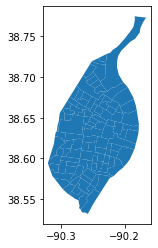

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming tracts_shapefile is your GeoDataFrame containing the shapefile data

# Read the shapefile into a GeoDataFrame
tracts_shapefile = gpd.read_file('data\AllTract.shp')

# Plot the shapefile
tracts_shapefile.plot()

# Show the plot
plt.show()
